In [1]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

df = pd.read_csv("mnist_train.csv")
df.head()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def load_data(path):
    df = pd.read_csv(path)
    y = np.array([label if label < 9
                 else label-1 for label in df['label']])
    df = df.drop('label', axis=1)
    x = np.array([df.iloc[i].to_numpy().reshape((28, 28))
                 for i in range(len(df))]).astype(float)
    x = np.expand_dims(x, axis=3)
    y = pd.get_dummies(y).values
    
    return x, y
X_train, Y_train = load_data('mnist_train.csv')
X_test, Y_test = load_data('mnist_test.csv')

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 9)
(10000, 28, 28, 1) (10000, 9)


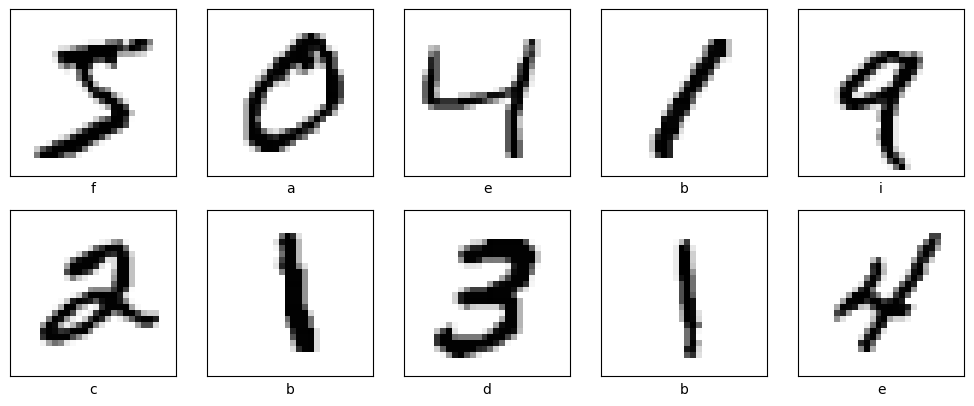

In [ ]:
class_names = list(string.ascii_lowercase[:26].replace(
'j', '').replace('z', ''))

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()